## Direct Visualization of Labels

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
def visualize_lane_labels(image_path, labels):
    img = mpimg.imread(image_path)

    # Plot image
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    colors = ['red', 'blue', 'green', 'orange']

    # Plot each lane
    for lane_idx, lane in enumerate(labels["lanes"]):
        xs = lane
        ys = labels["h_samples"]
        for x, y in zip(xs, ys):
            if x != -2:
                plt.scatter(x, y, color=colors[lane_idx], s=10)  # s controls circle size

    plt.title("Lanes Visualization")
    plt.axis("off")

    plt.show()

In [ ]:
image_path = "TUSimple/train_set/clips/0313-1/5320/20.jpg"

labels = {"lanes": [[-2, -2, -2, 658, 646, 635, 623, 612, 601, 589, 578, 566, 555, 544, 532, 521, 509, 498, 487, 475, 464, 452, 441, 430, 418, 407, 395, 384, 373, 361, 350, 338, 327, 316, 304, 293, 282, 270, 259, 247, 236, 225, 213, 202, 190, 179, 168, 156], [-2, -2, -2, -2, 724, 735, 746, 756, 767, 778, 789, 800, 810, 821, 832, 843, 854, 864, 875, 886, 897, 908, 918, 929, 940, 951, 962, 973, 983, 994, 1005, 1016, 1027, 1037, 1048, 1059, 1070, 1081, 1091, 1102, 1113, 1124, 1135, 1146, 1156, 1167, 1178, 1189], [-2, -2, -2, 603, 570, 538, 506, 473, 441, 408, 376, 344, 311, 279, 247, 214, 182, 149, 117, 85, 52, 20, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2], [-2, -2, -2, 780, 811, 843, 875, 906, 938, 970, 1001, 1033, 1065, 1096, 1128, 1160, 1191, 1223, 1255, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]], "h_samples": [240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710]}

In [ ]:
visualize_lane_labels(image_path, labels)

## Visualization After Gridding

### Random Dataloader image

In [2]:
from torch.utils.data import DataLoader
from datasets.tusimple import TuSimpleLaneDataset
from utils.dataloader_utils import lane_collate_fn
from utils.visualize_labels import visualize_cls_targets
import numpy as np

In [ ]:
dataset = TuSimpleLaneDataset(
    json_file='TUSimple/train_set/train_label.json',
    dataset_root='TUSimple/train_set',
    img_size=(360, 640)
)

loader = DataLoader(dataset, batch_size=4, shuffle=True, collate_fn=lane_collate_fn)

In [ ]:
batch = next(iter(loader))

# Visualize the first image in the batch
visualize_cls_targets(
    image_tensor=batch['image'][0],
    cls_targets=batch['cls_targets'][0],
    row_anchors=np.linspace(160, 710, 56),
    gridding_num=100,
    img_path=batch['img_path'][0]
)

### Same Image Used For Direct Visualization

In [3]:
from PIL import Image
from torchvision import transforms
from utils.target_generator import generate_lane_targets
import torch

In [4]:
def visualize_target_grids(img_path, labels):
    image = Image.open(img_path).convert('RGB')
    original_size = image.size  # (W, H)

    image = transforms.Compose([
                    transforms.Resize((360, 640)),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225])
                ])(image)
    
    # Parse lane annotations
    lanes = labels['lanes']
    h_samples = labels['h_samples']

    # Convert lane points to (x, y)
    lane_points = []
    for lane in lanes:
        points = []
        for x, y in zip(lane, h_samples):
            if x != -2:
                norm_x = x / original_size[0] * 640
                norm_y = y / original_size[1] * 360
                points.append((norm_x, norm_y))
        lane_points.append(points)

    row_anchors = np.linspace(160, 710, 56)
    scaled_row_anchors = [r / original_size[1] * 360 for r in row_anchors]

    cls_targets = generate_lane_targets(
        lane_points=lane_points,
        row_anchors=scaled_row_anchors,
        img_w=640,
        gridding_num=100,
        num_lanes=4
    )

    visualize_cls_targets(
        image_tensor=image,
        cls_targets=torch.tensor(cls_targets, dtype=torch.long),
        row_anchors=np.linspace(160, 710, 56),
        gridding_num=100
    )

In [ ]:
image = "TUSimple/train_set/clips/0313-1/5320/20.jpg"

labels = {"lanes": [[-2, -2, -2, 658, 646, 635, 623, 612, 601, 589, 578, 566, 555, 544, 532, 521, 509, 498, 487, 475, 464, 452, 441, 430, 418, 407, 395, 384, 373, 361, 350, 338, 327, 316, 304, 293, 282, 270, 259, 247, 236, 225, 213, 202, 190, 179, 168, 156], [-2, -2, -2, -2, 724, 735, 746, 756, 767, 778, 789, 800, 810, 821, 832, 843, 854, 864, 875, 886, 897, 908, 918, 929, 940, 951, 962, 973, 983, 994, 1005, 1016, 1027, 1037, 1048, 1059, 1070, 1081, 1091, 1102, 1113, 1124, 1135, 1146, 1156, 1167, 1178, 1189], [-2, -2, -2, 603, 570, 538, 506, 473, 441, 408, 376, 344, 311, 279, 247, 214, 182, 149, 117, 85, 52, 20, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2], [-2, -2, -2, 780, 811, 843, 875, 906, 938, 970, 1001, 1033, 1065, 1096, 1128, 1160, 1191, 1223, 1255, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]], "h_samples": [240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710]}

In [ ]:
visualize_target_grids(image, labels)

## GT v/s Predicted Labels on Test Set

In [5]:
test_image = "TUSimple/test_set/clips/0530/1492720183607312769_0/20.jpg"

test_gt_labels = {"lanes": [[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, 481, 448, 415, 382, 349, 316, 283, 251, 218, 185, 152, 119, 86, 53, 20, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2], [-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, 585, 574, 564, 553, 543, 533, 522, 512, 501, 491, 480, 470, 459, 449, 438, 428, 417, 407, 396, 386, 375, 365, 355, 344, 334, 323, 313, 302, 292, 281, 271, 260, 250, 239, 229, 218, 208, 197, 187, 176, 166, 156, 145, 135], [-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, 677, 690, 702, 714, 727, 739, 751, 764, 776, 788, 801, 813, 826, 838, 850, 863, 875, 887, 900, 912, 924, 937, 949, 961, 974, 986, 998, 1011, 1023, 1035, 1048, 1060, 1072, 1085, 1097, 1109, 1122, 1134, 1146, 1159, 1171, 1183, 1196, 1208], [-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, 722, 755, 788, 821, 855, 888, 921, 954, 987, 1020, 1054, 1087, 1120, 1153, 1186, 1220, 1253, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]], "h_samples": [160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710]}

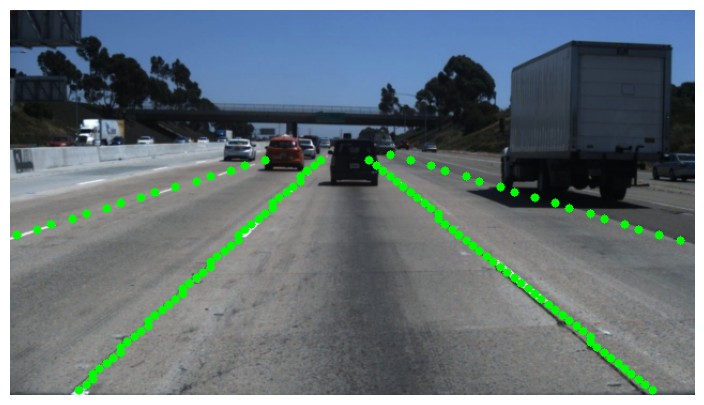

In [6]:
visualize_target_grids(test_image, test_gt_labels)

In [7]:
from models.ultrafast_lane_net import UltraFastLaneNet
import cv2

In [8]:
@torch.no_grad()
def infer_single_image(model_path, image_path, img_size=(360, 640), gridding_num=100, num_lanes=4, num_rows=56, row_anchors=None):
    
    # Default row anchors
    if row_anchors is None:
        row_anchors = np.linspace(160, 710, num_rows).astype(int).tolist()

    # Load image and preprocess
    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([
        transforms.Resize(img_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    image_tensor = transform(image).unsqueeze(0)  # [1, 3, H, W]

    # Load model
    model = UltraFastLaneNet(
        backbone="resnet18",
        pretrained=False,
        gridding_num=gridding_num,
        num_rows=num_rows,
        num_lanes=num_lanes
    )
    model.load_state_dict(torch.load(model_path, map_location='cpu'))
    model.eval()

    # Predict
    logits = model(image_tensor)  # [1, C, R, griding_num + 1]
    ignore_index = gridding_num
    probs = torch.softmax(logits[:, :, :, :ignore_index], dim=-1)
    cls_targets = torch.argmax(probs, dim=-1)[0]  # [L, R]

    return cls_targets  # [num_lanes, num_rows]

In [9]:
pred_cls_targets = infer_single_image('checkpoints/best_model.pth', test_image)

/Users/feroz/Personal/ML/python_env/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/feroz/Personal/ML/python_env/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [10]:
image = Image.open(test_image).convert('RGB')

# Apply transform
image = transforms.Compose([
        transforms.Resize((360, 640)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])
    ])(image)

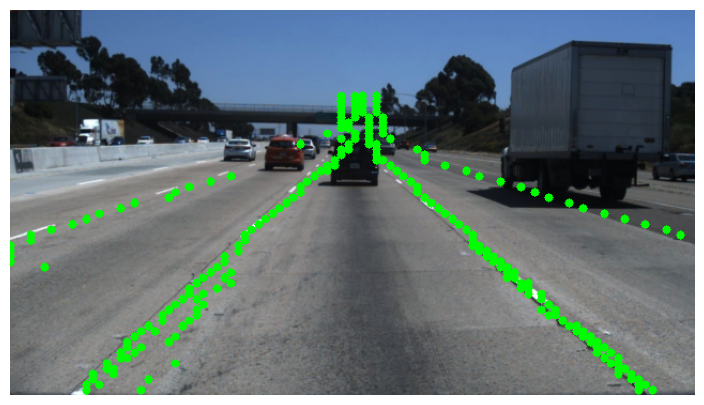

In [11]:
visualize_cls_targets(
    image_tensor=image,
    cls_targets=pred_cls_targets,
    row_anchors=np.linspace(160, 710, 56),
    gridding_num=100
)